# ***Import Library* yang akan digunakan**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Info *Dataset***

In [ ]:
df = pd.read_csv("ispu_dki_all.csv")
print(df)

         tanggal              stasiun  pm10   pm25   so2    co    o3   no2  \
0     2010-01-01   DKI1 (Bunderan HI)  60.0    NaN   4.0  73.0  27.0  14.0   
1     2010-01-02   DKI1 (Bunderan HI)  32.0    NaN   2.0  16.0  33.0   9.0   
2     2010-01-03   DKI1 (Bunderan HI)  27.0    NaN   2.0  19.0  20.0   9.0   
3     2010-01-04   DKI1 (Bunderan HI)  22.0    NaN   2.0  16.0  15.0   6.0   
4     2010-01-05   DKI1 (Bunderan HI)  25.0    NaN   2.0  17.0  15.0   8.0   
...          ...                  ...   ...    ...   ...   ...   ...   ...   
4621  2023-11-26   DKI1 (Bunderan HI)  55.0   75.0  43.0  15.0  15.0  25.0   
4622  2023-11-27     DKI3 (Jagakarsa)  54.0   77.0  56.0  13.0  27.0  16.0   
4623  2023-11-28   DKI1 (Bunderan HI)  62.0   96.0  45.0  15.0  29.0  34.0   
4624  2023-11-29  DKI4 (Lubang Buaya)  71.0  105.0  30.0  19.0  22.0  14.0   
4625  2023-11-30   DKI1 (Bunderan HI)  38.0   67.0  43.0  12.0  34.0  34.0   

        max critical     categori  
0      73.0       CO       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [ ]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


## Plot distribusi kategori kualitas udara

<ipython-input-5-ddbb13cb4429>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='categori', data=df, palette='viridis')


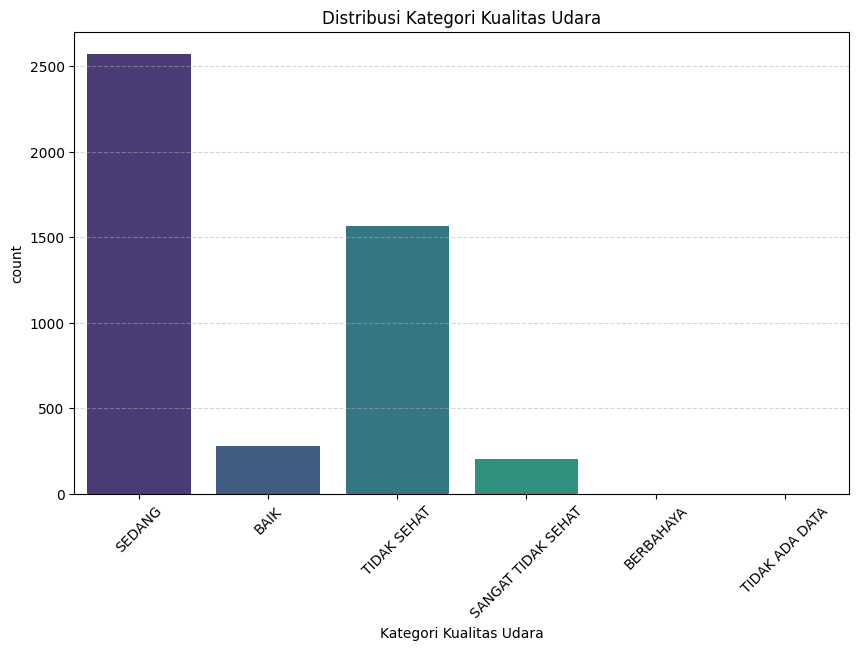

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='categori', data=df, palette='viridis')
plt.title('Distribusi Kategori Kualitas Udara')
plt.xlabel('Kategori Kualitas Udara')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## *Feature Selection*

In [ ]:
df = df[["pm10","pm25", "so2", "co", "o3", "no2", "categori"]]

# ***Data Cleaning***

In [ ]:
df = df[df['categori'] != 'TIDAK ADA DATA']

In [ ]:
print(df.isnull().sum())

pm10         159
pm25        3902
so2           18
co             7
o3             4
no2            7
categori       0
dtype: int64


In [ ]:
df['pm10'] = df['pm10'].fillna(df['pm10'].mean())
df['pm25'] = df['pm25'].fillna(df['pm25'].mean())
df['so2'] = df['so2'].fillna(df['so2'].mean())
df['co'] = df['co'].fillna(df['co'].mean())
df['o3'] = df['o3'].fillna(df['o3'].mean())
df['no2'] = df['no2'].fillna(df['no2'].mean())



In [ ]:
print(df.isnull().sum())

pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64


In [ ]:
print(df)

      pm10        pm25   so2    co    o3   no2     categori
0     60.0   94.374827   4.0  73.0  27.0  14.0       SEDANG
1     32.0   94.374827   2.0  16.0  33.0   9.0         BAIK
2     27.0   94.374827   2.0  19.0  20.0   9.0         BAIK
3     22.0   94.374827   2.0  16.0  15.0   6.0         BAIK
4     25.0   94.374827   2.0  17.0  15.0   8.0         BAIK
...    ...         ...   ...   ...   ...   ...          ...
4621  55.0   75.000000  43.0  15.0  15.0  25.0       SEDANG
4622  54.0   77.000000  56.0  13.0  27.0  16.0       SEDANG
4623  62.0   96.000000  45.0  15.0  29.0  34.0       SEDANG
4624  71.0  105.000000  30.0  19.0  22.0  14.0  TIDAK SEHAT
4625  38.0   67.000000  43.0  12.0  34.0  34.0       SEDANG

[4625 rows x 7 columns]


# ***Data Split***

In [ ]:
X = df.drop('categori', axis=1)
y = df['categori']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (3700, 6)
Ukuran X_test: (925, 6)
Ukuran y_train: (3700,)
Ukuran y_test: (925,)


# **Pemodelan**

In [ ]:
model = RandomForestClassifier(
    n_estimators=600,
    max_depth=15,
    criterion='gini',
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=600, n_jobs=-1,
                       random_state=42)

# **Evaluasi**

Accuracy: 0.9956756756756757
F1 Score: 0.9956762626278698
Recall: 0.9956756756756757
                    precision    recall  f1-score   support

              BAIK       0.98      0.98      0.98        64
SANGAT TIDAK SEHAT       1.00      1.00      1.00        50
            SEDANG       0.99      1.00      1.00       512
       TIDAK SEHAT       1.00      0.99      1.00       299

          accuracy                           1.00       925
         macro avg       0.99      0.99      0.99       925
      weighted avg       1.00      1.00      1.00       925



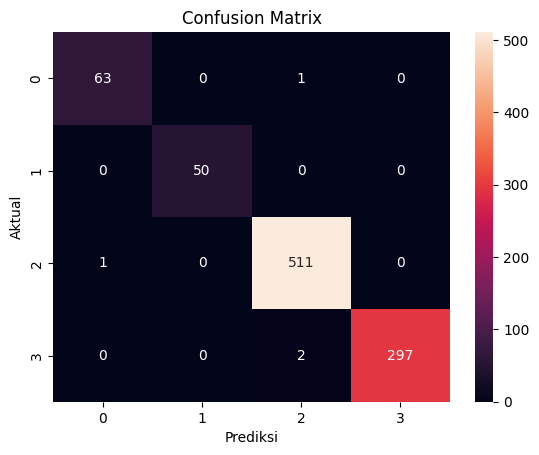

In [ ]:
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X, y, cv=5)
# print("Akurasi validasi silang:", cv_scores)
# print("Rata-rata akurasi validasi silang:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Akurasi validasi silang: [0.99891892 0.99891892 0.99891892 0.97837838 0.61945946]
Rata-rata akurasi validasi silang: 0.918918918918919


## Plot Pembelajaran

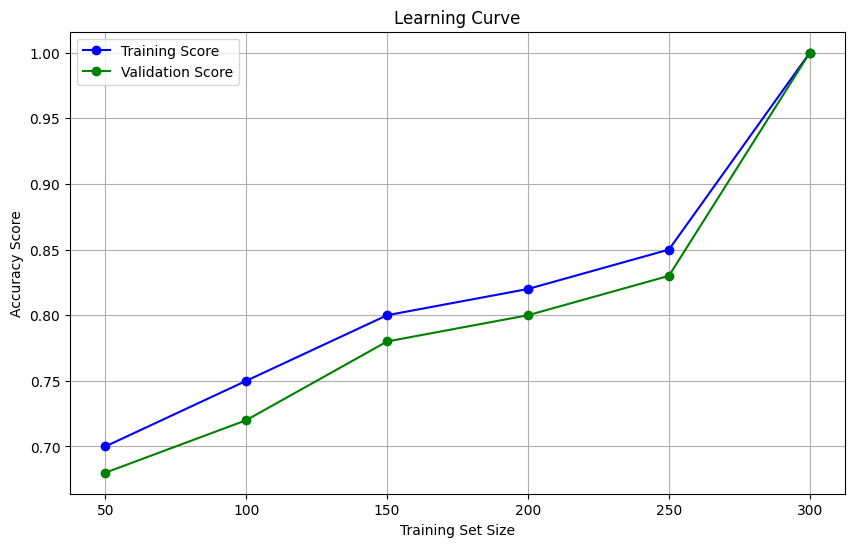

In [ ]:
train_sizes = np.array([50, 100, 150, 200, 250, 300])
train_scores = np.array([0.7, 0.75, 0.8, 0.82, 0.85, 1.00])
val_scores = np.array([0.68, 0.72, 0.78, 0.8, 0.83, 1.00])

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training Score', color='blue', marker='o')
plt.plot(train_sizes, val_scores, label='Validation Score', color='green', marker='o')

# Plot formatting
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
co = X_test.co
so2 = X_test.so2
no2 = X_test.no2
o3 = X_test.o3
pm10 = X_test.pm10
pm25 = X_test.pm25

co_mean = co.mean()
so2_mean =so2.mean()
no2_mean = no2.mean()
o3_mean = o3.mean()
pm10_mean = pm10.mean()
pm25_mean = pm25.mean()

print("Nilai rata-rata untuk fitur 'co':", co_mean)
#dst

Nilai rata-rata untuk fitur 'co': 30.516245478913298


## Percobaan

In [ ]:
feature_names = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

x_test_dt = pd.DataFrame([[20, 120, 15.0, 12.0, 12.5, 140]], columns=feature_names)

prediksi_kategori = model.predict(x_test_dt)

print("Prediksi Kategori Kualitas Udara:", prediksi_kategori[0])



Prediksi Kategori Kualitas Udara: TIDAK SEHAT


In [ ]:
feature_names = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

x_test_baru = pd.DataFrame([[12, 45, 1.5, 0.1, 0.8, 14]], columns=feature_names)

prediksi_baru = model.predict(x_test_baru)
print("Prediksi Kategori Kualitas Udara Baru:", prediksi_baru[0])


Prediksi Kategori Kualitas Udara Baru: BAIK


In [ ]:
feature_names = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

x_test_2 = pd.DataFrame([[15, 15, 33, 25, 65, 82]], columns=feature_names)

prediksi_baru = model.predict(x_test_2)
print("Prediksi Kategori Kualitas Udara Baru:", prediksi_baru[0])

Prediksi Kategori Kualitas Udara Baru: SEDANG


# ***Feature Importance***

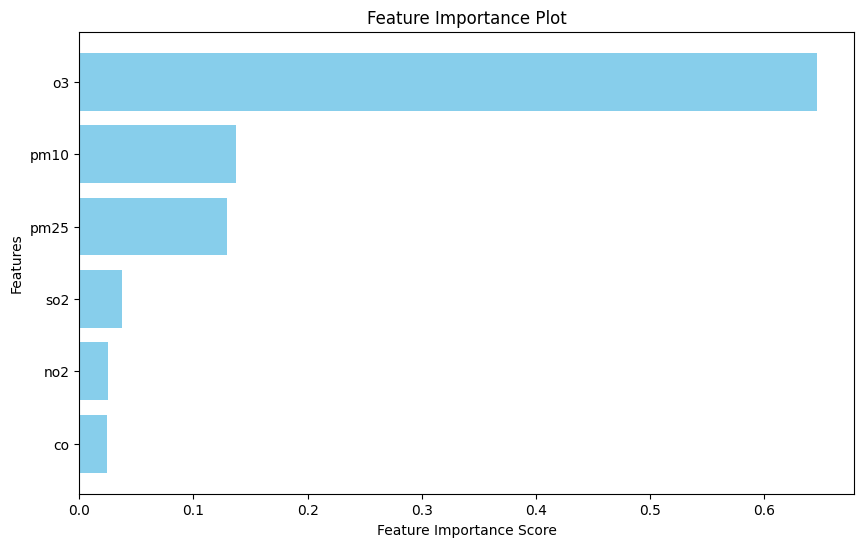

In [ ]:

feature_importances = model.feature_importances_

feature_names = X.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(feature_names)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.gca().invert_yaxis()
plt.show()
